In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-jobs-comprehensive-dataset/data_science_job.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-science-jobs-comprehensive-dataset/data_science_job.csv',encoding='latin-1')
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [3]:
df.shape

(3198, 8)

In [4]:
df.describe()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [6]:
df.dtypes

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object

In [7]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [8]:
df.duplicated().sum()

202

In [9]:
df1 = df.dropna()

In [10]:
df1.isnull().sum()

Company                       0
Job Title                     0
Location                      0
Job Type                      0
Experience level              0
Salary                        0
Requirment of the company     0
Facilities                    0
dtype: int64

In [11]:
df1.duplicated().sum()

177

In [12]:
df1 = df1.drop_duplicates()

In [13]:
df1.duplicated().sum()

0

In [14]:
df1.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
5,ServiceNow,Sr Staff Data Scientist - ATG,"Kirkland, Washington, United States",Full Time,Senior-level,184K+,"Computer Science,Deep Learning,Industrial,Mach...","401(k) matching,Career development,Competitive..."


In [15]:
df1['Company'].value_counts()

Publicis Groupe                   102
Bosch Group                        70
Amazon.com                         53
Block                              44
Visa                               40
                                 ... 
Cleo AI Ltd                         1
ZFX                                 1
Aledade                             1
IXL Learning                        1
Galileo Financial Technologies      1
Name: Company, Length: 1006, dtype: int64

In [16]:
df1['Job Title'].value_counts()

Data Engineer                                         90
Data Scientist                                        72
Data Analyst                                          69
Senior Data Engineer                                  63
Machine Learning Engineer                             41
                                                      ..
Senior Data Scientist - Retailer                       1
Associate Director, Business Intelligence              1
Sr. Data Engineer - (Java + Spark)                     1
Staff Software Engineer - Streaming Data Pipelines     1
Data Scientist - New College Graduate                  1
Name: Job Title, Length: 1881, dtype: int64

In [17]:
df1['Job Type'].value_counts()

Full Time    2596
Part Time       4
Name: Job Type, dtype: int64

In [18]:
df1['Experience level'].value_counts()

Senior-level       1701
Mid-level           433
Entry-level         349
Executive-level     117
Name: Experience level, dtype: int64

In [19]:
df1['Salary'].value_counts()

 115K+ *    242
 62K+ *     200
 92K+ *     165
 129K+ *    157
 55K+ *     145
           ... 
 227K+        1
 111K+        1
 51K+         1
 83K+         1
 117K+        1
Name: Salary, Length: 214, dtype: int64

<Axes: ylabel='Experience level'>

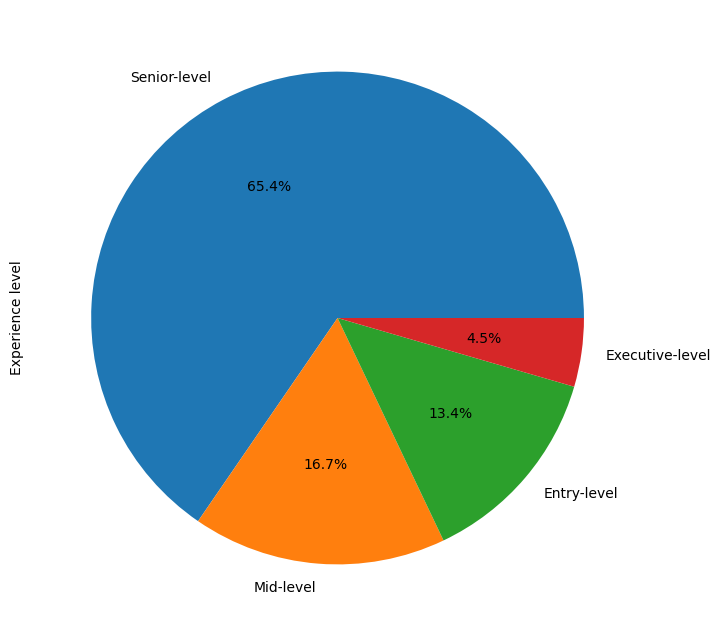

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
df1['Experience level'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Job Type'>

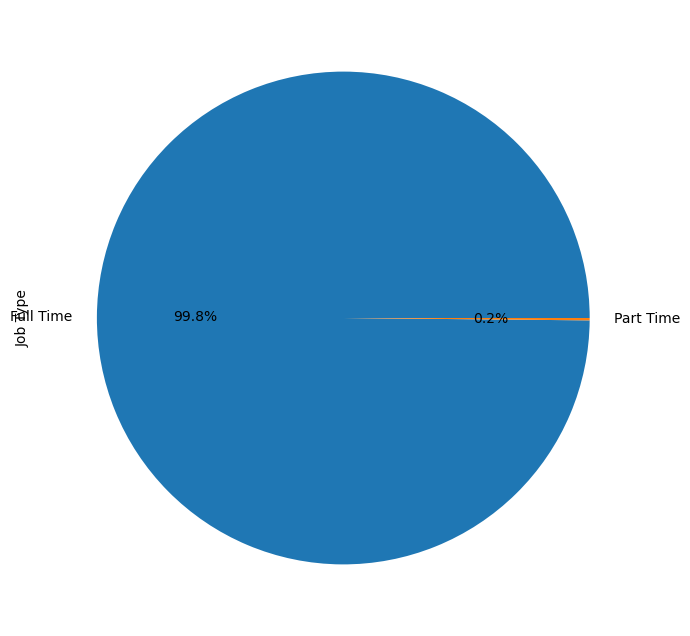

In [21]:
plt.figure(figsize=(20,8))
df1['Job Type'].value_counts().plot.pie(autopct='%1.1f%%')